# Required Libraries
The python environment comes with pre-installed analytics libraries. Load the following required libraries and packages. 

In [36]:
#import required libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt #matplotlib for visualization
%matplotlib inline
import seaborn as sns #seaborn for visualization
sns.set_theme(color_codes = True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')



In [37]:
data = pd.read_csv("Bank Churn Data/Bank Customer Churn Prediction.csv") #load csv dataset as pandas dataframe

#Visit 'https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset' and download the dataset from Kaggle. The data is stored in a CSV file format. 

In [38]:
data.shape #returns a tuple value with the shape (rows and columns) of the dataframe 

(10000, 12)

# Data Analysis

In [39]:
#Data Analysis
data.info() #provide detailed information on each column of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [40]:
data.head() #display first 5 lines of the dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
data.nunique() #display number of unique values for each column

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [42]:
data.dtypes #display the data type of each column


customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

# Data Preprocessing
Data preprocessing entails deleting unwanted columns and checking the dataset for null (missing values).  

In [43]:

finaldata = data.drop('customer_id', axis = 1) #deletion of unecessary columns 
finaldata.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
finaldata.isnull().head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [45]:
finaldata.isnull().sum() #check the columns list for null (missing) values

#There are 0 missing values in the dataset

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# Exploratory Data Analysis
Exploratory data analysis was conducted to study the apparent correlation between select features and churn outcome. 


<AxesSubplot:xlabel='active_member', ylabel='count'>

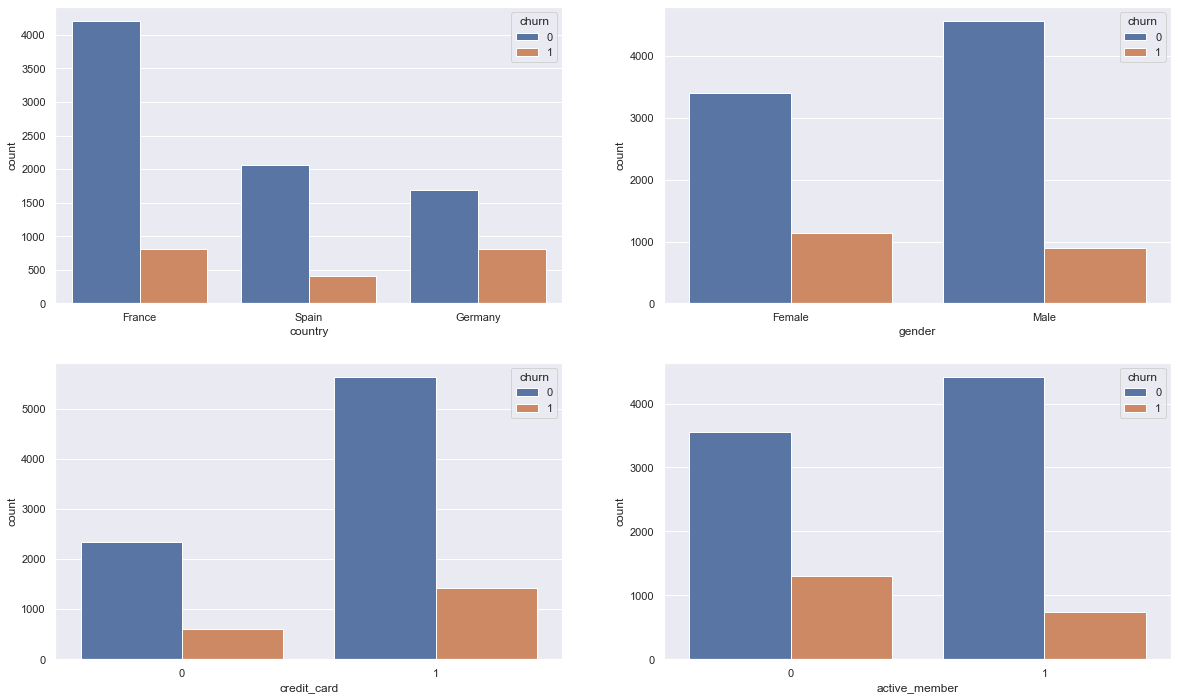

In [46]:
    #graphical analysis
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='country', hue = 'churn',data = finaldata, ax=axarr[0][0])
    sns.countplot(x='gender', hue = 'churn',data = finaldata, ax=axarr[0][1])
    sns.countplot(x='credit_card', hue = 'churn',data = finaldata, ax=axarr[1][0])
    sns.countplot(x='active_member', hue = 'churn',data = finaldata, ax=axarr[1][1])


0    7963
1    2037
Name: churn, dtype: int64


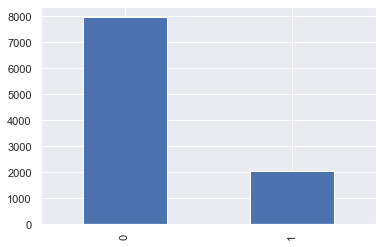

In [47]:
#Count the churned observations in the dataset and visualize the results in a bar graph
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = finaldata["churn"].map(lambda x: color_wheel.get(x + 1))
print(finaldata.churn.value_counts())
p=finaldata.churn.value_counts().plot(kind="bar")



In [48]:
# It is important to change the value in the Country and Gender columns so the machine learning models can read and predict the dataset
#change the values in the'country' column
finaldata['country'] = finaldata['country'].replace(['Germany'],'0')
finaldata['country'] = finaldata['country'].replace(['France'],'1')
finaldata['country'] = finaldata['country'].replace(['Spain'],'2')
#change the values in the 'gender' column
finaldata['gender'] = finaldata['gender'].replace(['Female'],'0')
finaldata['gender'] = finaldata['gender'].replace(['Male'],'1')

In [49]:
#convert object data types to integer data types
finaldata['country'] = pd.to_numeric(finaldata['country'])
finaldata['gender'] = pd.to_numeric(finaldata['gender'])
finaldata.dtypes

credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

<AxesSubplot:>

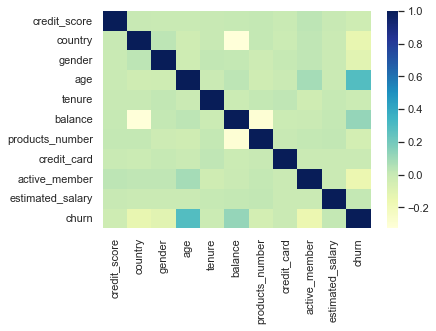

In [65]:
sns.heatmap(finaldata.corr(), fmt='.2g', cmap = "YlGnBu")

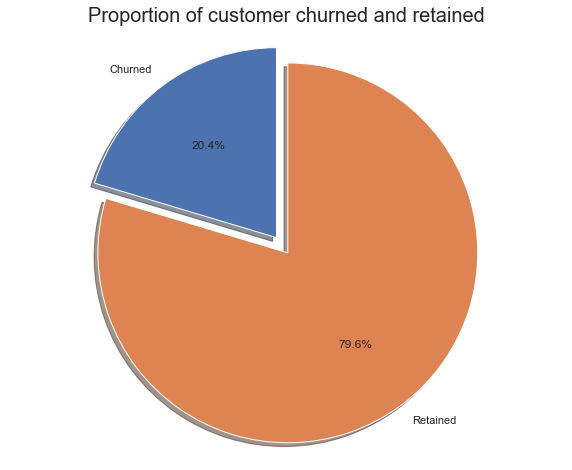

In [51]:
#pie chart visualization
labels = 'Churned', 'Retained'
sizes = [finaldata.churn[finaldata['churn']==1].count(), finaldata.churn[finaldata['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# Test & Train The Data
The customer data is split into test and train datasets. Customers that did not churn ('Churn' = 0) are allocated to the test set, and Customers that did churn ('Churn' = 1) are allocated to the train set. From this point onwards testing and training data are treated separately to prevent data leakage between the two which could adversely affect machine learning effectiveness.

In [52]:
#train and split data
X = finaldata.drop('churn', axis=1)
y = finaldata['churn']

#test size- 20%; train size- 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [53]:
# initialize the decision tree model 
clf = DecisionTreeClassifier(criterion='entropy')

#fit the classifier on the training data and make predictions on the test set
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [54]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)


print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score : 78.0 %


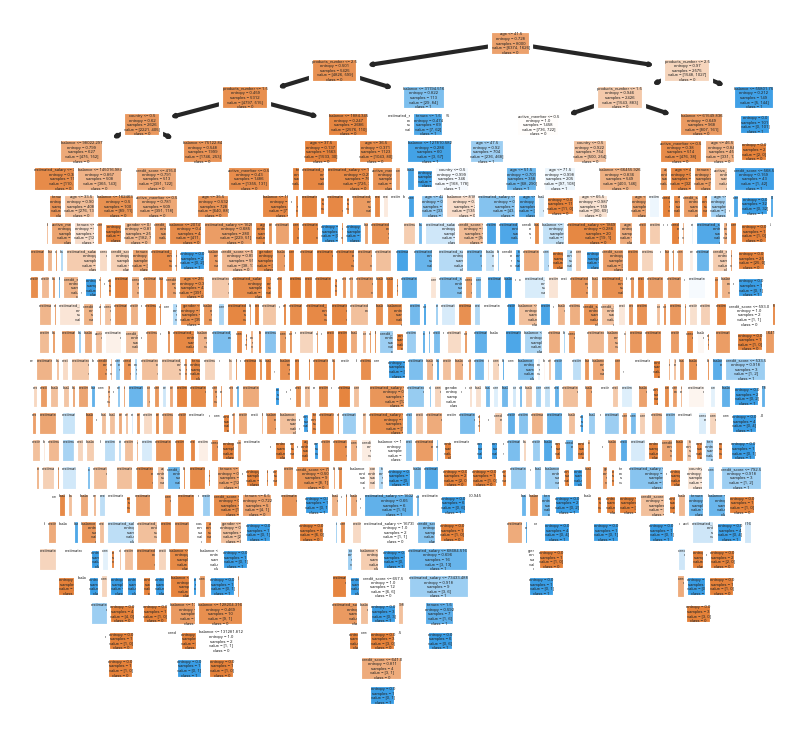

In [55]:
#plot the decision tree; simple, baseline model
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = finaldata.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [56]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.3 %


In [57]:
#Gridsearch
#Gridsearch was used to derive the best set of hyperparameters. Gridsearch passes all combinations of hyperparameters one by one into the model and checks the result.The output depicts the hyperparemeters which gives the best result after passing in the model.

param_grid = { #set parameters for gridsearch
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 15],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}

In [58]:
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 5, 10, 15],
 'min_samples_split': [1, 5, 10, 20]}

# Feature Importance

In [59]:
#decision tree feature importance
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 5, random_state = 42)

dt.fit(X_train, y_train)


for fi, feature in zip(dt.feature_importances_, X_train.columns):
    print(fi, feature)

0.0 credit_score
0.03536740448023955 country
0.0 gender
0.39203552895950283 age
0.003612515259702534 tenure
0.10155837681808404 balance
0.3929841073385018 products_number
0.0 credit_card
0.06933457498368469 active_member
0.005107492160284711 estimated_salary


<AxesSubplot:>

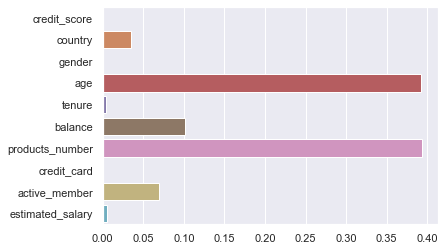

In [60]:
sns.barplot(x=dt.feature_importances_, y = X_train.columns)

In [61]:
grid_search = GridSearchCV(rfc,param_grid,cv = 3,return_train_score = True, n_jobs = 3)
grid_search.fit(X_train, y_train)

grid_search.best_params_


{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 10}

In [62]:
#Random Forest feature importance
dt = RandomForestClassifier(criterion = 'gini', max_depth = 15, min_samples_split = 10, random_state = 42)

dt.fit(X_train, y_train)


for fi, feature in zip(dt.feature_importances_, X_train.columns):
    print(fi, feature)

0.11041426683733549 credit_score
0.042630930198968645 country
0.017254742064950035 gender
0.28113909645475627 age
0.05714927214224155 tenure
0.13068890134435115 balance
0.18997130622490616 products_number
0.011125166383277174 credit_card
0.05079190442630105 active_member
0.10883441392291245 estimated_salary


<AxesSubplot:>

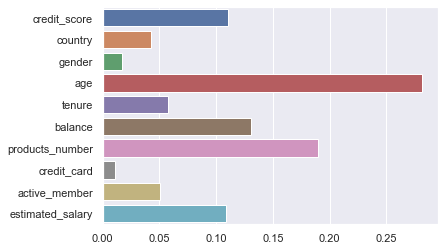

In [63]:
sns.barplot(x=dt.feature_importances_, y = X_train.columns)


In [66]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=10, random_state=42)